<a href="https://colab.research.google.com/github/felipepenha/seaborn-presets/blob/master/seaborn_LaTeX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# %%% SEABORN PLOT CONFIGURATION %%%%
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# References:
#  [1] https://stackoverflow.com/questions/55746749/latex-equations-do-not-render-in-google-colaboratory-when-using-matplotlib
#  [2] https://learnsharewithdp.wordpress.com/2020/05/08/latex-matplotlib-google-colab/

! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm/type1cm.sty #7
! sudo texhash #8
! apt install cm-super #9

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

from pprint import pprint

! pip freeze | grep 'matplotlib\|seaborn'

# References: 
# [1] https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# [2] https://seaborn.pydata.org/tutorial/aesthetics.html
# [3] https://github.com/mwaskom/seaborn/blob/master/seaborn/rcmod.py

rc_base = {}

rc_font_size_base = {
    # --- FONT SIZE ---         
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'legend.title_fontsize': 11,
    'axes.linewidth': 1.25,
    'grid.linewidth': 1,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'patch.linewidth': 1,
    'xtick.major.width': 1.25,
    'ytick.major.width': 1.25,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
}

font_scaling = 1.5

rc_font_size_scaled = {
    k: str(int(v * font_scaling)) 
    for k, v in rc_font_size_base.items()
    }

rc_custom = {**rc_base, **rc_font_size_scaled}

pprint(rc_custom)

sns.set_style('ticks')

sns.set_context('paper', rc=rc_custom)

# --- LATEX FONTS ---
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Computer Modern'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

matplotlib.rcParams['mathtext.fallback_to_cm'] = True
matplotlib.rcParams['axes.formatter.use_mathtext'] = True

matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'

# --- TICKS ---
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


matplotlib==3.2.2
matplotlib-venn==0.11.5
seaborn==0.10.1
{'axes.labelsize': '18',
 'axes.linewidth': '1',
 'axes.titlesize': '21',
 'font.size': '18',
 'grid.linewidth': '1',
 'legend.fontsize': '16',
 'legend.title_fontsize': '16',
 'lines.linewidth': '2',
 'lines.markersize': '9',
 'patch.linewidth': '1',
 'xtick.labelsize': '16',
 'xtick.major.size': '6',
 'xtick.major.width': '1',
 'xtick.minor.size': '4',
 'xtick.minor.width': '1',
 'ytick.labelsize': '16',
 'ytick.major.size': '6',
 'ytick.major.width': '1',
 'ytick.minor.size': '4',
 'ytick.minor.width': '1'}


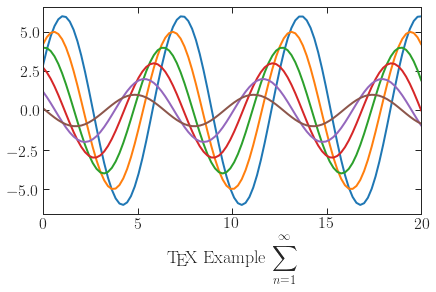

In [2]:
import numpy as np

def sinplot(flip=1):
    x = np.linspace(0, 20, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        plt.xlim(0., 20.)
        plt.xlabel(r'\TeX\ Example $\displaystyle\sum_{n=1}^\infty$')

sinplot()

# Save Figure
plt.tight_layout(.5);
plt.savefig('test_sinplot.pdf');

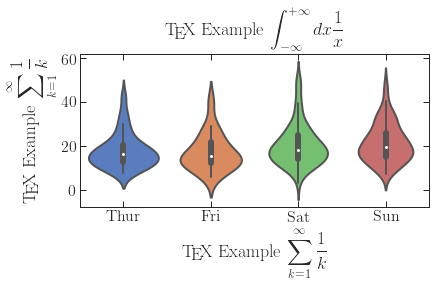

In [3]:
tips = sns.load_dataset("tips")

sns.violinplot(x="day", y="total_bill", data=tips, palette="muted")

plt.title(
    r'\TeX\ Example $\displaystyle\int_{-\infty}^{+\infty}dx\frac{1}{x}$',
    fontsize=18,
    y=1.1
  );

plt.xlabel(r'\TeX\ Example $\displaystyle\sum_{k=1}^\infty\frac{1}{k}$');

plt.ylabel(r'\TeX\ Example $\displaystyle\sum_{k=1}^\infty\frac{1}{k}$');


# Save Figure
plt.tight_layout(.5);
plt.savefig('test_violin.pdf');